# NOTEBOOK FOR GENERATING SUPPORTING INFO FIGURES

## Figures S1 and S2.

In [1]:
#Module loading
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

In [5]:
#Function which returns a pair (y, xs) based on the SN-model from Siegert et al. (2016).
#Given parameter choices, y is 'observations' and xs are the ensemble member forecasts.
def sim(beta=1, sigma_s=1, sigma_e=1, sigma_eta=1, N=20000):
    s = np.random.normal(0,sigma_s,N)
    e = np.random.normal(0,sigma_e,N)
    y = s + e
    xs = []
    #The ensemble size is manually set to 2000 here
    for k in range(2000):
        x = beta*s + np.random.normal(0,sigma_eta,N)
        xs.append(x)
    xs = np.array(xs)
    return y, xs

In [3]:
#Given an SN-model pair (y, xs) and a forecast probability p, 
#compute the proportion of times observations actually occurs.
def pf(y,xs,p,N=20000):
    xs_upper = np.percentile(xs.flatten(), 100*(2./3))
    ts = []
    props = []
    for t in range(N):
        prop=(xs[:,t]>xs_upper).sum()/2000.
        props.append(prop)
        if (p+0.05>prop) & (prop>p-0.05):
            ts.append(t)
    return np.array(ts), np.array(props)
        

## First generating the Monte Carlo samples used in Figure S1a

In [6]:
#Here we are generating the data required for Figure S1a. 
#We are picking SN-model parameters in a subset of parameter space; for each parameter choice, we are 
#computing the value P_r(P_f=1/3), with P_r the observed probability and P_f the forecast probability
#(as defined in the text)

p3s = []
for n in range(19):
    p3s.append([])


betas = np.arange(0.05, 1, 0.05)
sigma_es = np.arange(0.05, 2, 0.1)

#Looping over parameter choices
for n in range(19):
    print("n=%s" % n)
    for m in range(20):
        beta = betas[n]
        sigma_e = sigma_es[m]
        sigma_s=1
        sigma_eta=np.sqrt(1-beta**2+sigma_e**2)
        y, xs = sim(beta, sigma_s, sigma_e, sigma_eta)
        ts, props = pf(y,xs,1./3)
        yprop = (y[ts]>np.percentile(y, 100*(2./3))).sum()/len(ts)
        p3s[n].append(yprop)

p3s = np.array(p3s)

n=0
n=1
n=2
n=3
n=4
n=5
n=6
n=7
n=8
n=9
n=10
n=11
n=12
n=13
n=14
n=15
n=16
n=17
n=18


## Now generating data using exact formulae for Figure S1b

In [7]:
from scipy.special import erfc, erfcinv

In [8]:
#This implements formula (12) from the SI
def P_r(P_f, beta, sigma_s, sigma_e, sigma_eta):
    top = sigma_eta*erfcinv(2*P_f) + erfcinv(2./3)*(beta*np.sqrt(sigma_s**2+sigma_e**2) - np.sqrt(beta**2*sigma_s**2 + sigma_eta**2))
    bottom = beta*sigma_e
    total = (1./2)*erfc(top/bottom)
    return total

#This implements formula (11) from the SI
def ProbPf(P_f, beta, sigma_s, sigma_eta):
    dist = []
    for n in range(5000):
        s = np.random.normal(0,sigma_s)
        prob_s = (1./2)*erfc((1/(np.sqrt(2)*sigma_eta))*(-beta*s + np.sqrt(2)*erfcinv(2./3)*np.sqrt(beta**2*sigma_s**2+sigma_eta**2)))
        dist.append(prob_s)
    dist = np.array(dist)
    return dist
    

In [9]:
#Now looping over parameter space to generate values of P_r(P_f=1/3) using exact formulae.
#We use a finer spacing of the parameter range because it's much faster computing things exactly as 
#opposed to using Monte Carlo sampling!

betas = np.arange(0.05, 1, 0.05)
betas_theor = np.arange(-1, 1, 0.025)
sigma_es = np.arange(0.05, 2, 0.1)

p3s_theor = []
for n in range(len(betas_theor)):
    p3s_theor.append([])

for n in range(len(betas_theor)):
    #print("n=%s" % n)
    for m in range(20):
        beta = betas_theor[n]
        sigma_e = sigma_es[m]
        sigma_s=1
        sigma_eta=np.sqrt(1-beta**2+sigma_e**2)
        p_r=P_r(1./3, beta, sigma_s, sigma_e, sigma_eta)
        p3s_theor[n].append(p_r)

p3s_theor = np.array(p3s_theor)
print(p3s_theor.shape)

(80, 20)


## Plotting Figure S1

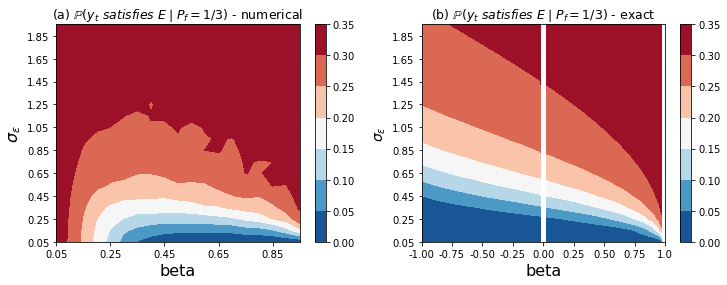

In [10]:
fig = plt.figure(figsize=(12,4))

ax = fig.add_subplot(121)
plt.contourf(p3s.T, levels=np.arange(0.0, 0.4, 0.05), cmap=plt.cm.RdBu_r)
plt.colorbar(extend='both')
plt.xticks(range(len(betas))[::4], ['%.2f' % betas[n] for n in range(len(betas))][::4])
plt.yticks(range(20)[::2], ['%.2f' % sigma_es[n] for n in range(20)][::2])
plt.xlabel('beta', fontsize=16)
plt.ylabel('$\sigma_{\epsilon}$', fontsize=16)
plt.title('(a) $\mathbb{P}(y_t \,\,satisfies\,\, E  \mid P_f=1/3)$ - numerical', fontsize=12.5)

ax = fig.add_subplot(122)
plt.contourf(p3s_theor.T, cmap=plt.cm.RdBu_r)
plt.colorbar(extend='both')
plt.xticks(range(len(betas_theor)+1)[::10], ['%.2f' % betas_theor[n] for n in range(len(betas_theor))][::10]+[1.0])
plt.xlim([0,80])
plt.yticks(range(20)[::2], ['%.2f' % sigma_es[n] for n in range(20)][::2])
ax.axvline(x=40, color='w', linewidth=5)
plt.xlabel('beta', fontsize=16)
plt.ylabel('$\sigma_{\epsilon}$', fontsize=14)
plt.title('(b) $\mathbb{P}(y_t \,\,satisfies\,\, E  \mid P_f=1/3)$ - exact', fontsize=12.5)

#plt.savefig('FigureS1.jpg', dpi=300)
plt.show()

## Now plotting Figure S2

In [11]:
#First generate the reliability curve corresponding to that predicted by the SN-model using the 
#SN-model parameters fitted to UKMO data (cf Siegert et al. 2016)
ps = np.linspace(0,1,1000)
prs = [P_r(p, 0.27, 0.79, 0.61, 0.99) for p in ps]

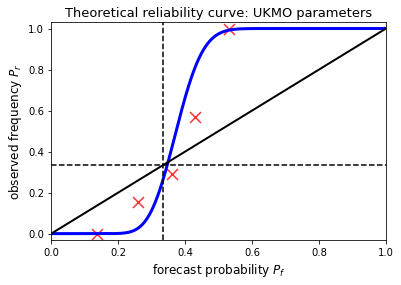

In [12]:
#These are the exact points we computed for the UKMO reliability diagram. We just had the function in
#the other notebook print these values, and then we pasted them in here by hand.
ukmo_ps = [0.1375, 0.26, 0.36, 0.43, 0.53]
ukmo_pfs = [0., 0.154, 0.29, 0.57, 1.]
sizes = 3*np.array([10., 65., 35., 35., 10.]) #These are the weights of each point

#Plotting
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(ps, np.array(prs), 'b-', linewidth=3)
plt.plot(ps, ps, 'k-', linewidth=2)
plt.scatter(ukmo_ps, ukmo_pfs, c='r', marker='x', s=120, alpha=0.8)
ax.axvline(x=1./3, linestyle='--', color='k', linewidth=1.5)
ax.axhline(y=1./3, linestyle='--', color='k', linewidth=1.5)
plt.xlim([0,1])
plt.ylim([-0.03,1.03])
plt.xlabel('forecast probability $P_f$', fontsize=12)
plt.ylabel('observed frequency $P_r$', fontsize=12)
plt.title('Theoretical reliability curve: UKMO parameters', fontsize=13)

#plt.savefig('FigureS2.jpg', dpi=300)
plt.show()